## run distance_SI.py in a notebook

In [16]:
import myDate
import sys
del sys.modules['distance_SI'] 
# from distance_SI import myGrid
import distance_SI
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm


In [17]:
# del sys.modules['distance_SI'] 
import distance_SI
year=2018
month=9
day=15
resolution=1

[lon_sie,lat_sie]=distance_SI.SIE(year,month,day,resolution)
# distancefromice[i,j]=distance_SI.distance_sie_point(LO[i,j],LA[i,j],lon_sie,lat_sie,lonmin,lonmax,latmin,latmax)



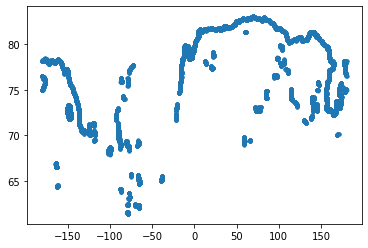

In [23]:
plt.plot(lon_sie,lat_sie,'.')

In [ ]:

distancefromice[i,j]=distance_SI.distance_sie_point(LO[i,j],LA[i,j],lon_sie,lat_sie,lonmin,lonmax,latmin,latmax)


In [25]:
import xarray as xr 
filename = '/data1/sassie/satellite/seaice/seaice_conc_daily_nh_f17_'+str(year)+str(month).zfill(2)+str(day).zfill(2)+'_v03r01.nc'
# [LA, LO,  ttime, llistvar, llistunit] = read_sic_nsidc(filename)

In [26]:
ds = xr.open_mfdataset(filename)

/home/kdrushka/miniconda3/envs/py33/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'melt_onset_day_seaice_conc_cdr' has multiple fill values {-1, 65535}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [27]:
ds

<xarray.Dataset>
Dimensions:                         (time: 1, xgrid: 304, ygrid: 448)
Coordinates:
  * time                            (time) datetime64[ns] 2018-09-15
  * ygrid                           (ygrid) float32 5.838e+06 ... -5.338e+06
  * xgrid                           (xgrid) float32 -3.838e+06 ... 3.738e+06
    latitude                        (ygrid, xgrid) float64 dask.array<chunksize=(448, 304), meta=np.ndarray>
    longitude                       (ygrid, xgrid) float64 dask.array<chunksize=(448, 304), meta=np.ndarray>
Data variables:
    projection                      |S1 ...
    seaice_conc_cdr                 (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    stdev_of_seaice_conc_cdr        (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    melt_onset_day_seaice_conc_cdr  (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    qa_of_seaice_conc_cdr           (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    goddard_merged_seaice_conc      (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    goddard_nt_seaice_conc          (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    goddard_bt_seaice_conc          (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
Attributes: (12/41)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...
    program:                   NOAA Climate Data Record Program
    cdr_variable:              seaice_conc_cdr
    software_version_id:       git@bitbucket.org:nsidc/seaice_cdr.git@e05e19c...
    ...                        ...
    platform:                  DMSP 5D-3/F17 > Defense Meteorological Satelli...
    sensor:                    SSMI/S > Special Sensor Microwave Imager/Sounder
    date_created:              2019-08-06T19:09:48Z
    time_coverage_start:       2018-09-15T00:00:00Z
    time_coverage_end:         2018-09-15T23:59:59Z
    comment:                   none

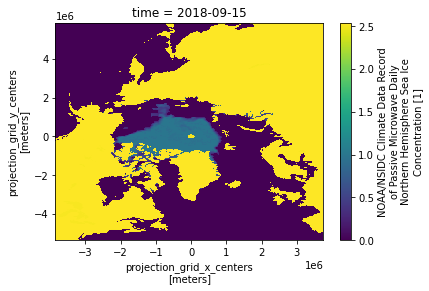

In [28]:
ds.seaice_conc_cdr.plot()

In [29]:
def distance_latlon(lat1,lon1,lat2,lon2):
    #compute the distance in km between 2 lat/lon points
    import math
    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)
    lon1 = math.radians(lon1)
    lon2 = math.radians(lon2)
    R = 6371  #radius of the earth in km
    x = (lon2 - lon1) * math.cos( 0.5*(lat2+lat1) )
    y = lat2 - lat1
    d = R * math.sqrt( x*x + y*y )
    return d